# Logistic Regression
Tutorial follows both: <br>
https://www.statology.org/logistic-regression-python <br>

In [1]:
#IMPORT PACKAGES
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt

## Load Data
Data consists of 10,000 students.  Features are student debt balance, and income.  Regressor is default (0:= did not default, 1:= defaulted)

In [2]:
#LOAD DATA
url = "https://raw.githubusercontent.com/Statology/Python-Guides/main/default.csv"
data=pd.read_csv(url)

In [6]:
data.shape

(10000, 4)

In [4]:
data.head()

,default,student,balance,income
0,0,0,729.526495,44361.625074
1,0,1,817.180407,12106.134700
2,0,0,1073.549164,31767.138947
3,0,0,529.250605,35704.493935
4,0,0,785.655883,38463.495879


## Create training and test datsets

In [8]:
X = data[['student', 'balance','income']]
y = data['default']

In [9]:
#split the dataset into training (70%) and testing (30%) sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

## Fit the logistic regression model

In [10]:
#instantiate the model
log_regression = LogisticRegression()

In [11]:
#fit the model using the training data
log_regression.fit(X_train,y_train)

LogisticRegression()

## Make predictions on test data using fitted model

In [12]:
#use model to make predictions on test data
y_pred = log_regression.predict(X_test)

## Evaluate Model fit

### Confusion Matrix

In [36]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[2870,   17],
       [  93,   20]], dtype=int64)

### Accuracy

In [21]:
print("SkLearn Accuracy:",metrics.accuracy_score(y_test, y_pred))

SkLearn Accuracy: 0.9633333333333334


In [22]:
print("Manual Accuracy:",(cnf_matrix[0,0]+cnf_matrix[1,1])/(cnf_matrix[0,0]+cnf_matrix[0,1]+cnf_matrix[1,0]+cnf_matrix[1,1]))

Manual Accuracy: 0.9633333333333334


### Precision

In [27]:
print("Sklearn Precision:",metrics.precision_score(y_test, y_pred))

Sklearn Precision: 0.5405405405405406


In [23]:
print("Manual Precision:",(cnf_matrix[0,0])/(cnf_matrix[0,0]+cnf_matrix[1,0]))

Manual Precision: 0.9686128923388457


What is going on here?  Why do these not match?  When we exaimine sklearn documentation we see the following definition:<br>

$\textit{"By definition, entry ij in a confusion matrix is the number of observations actually in group i, but predicted to be in group j."}$

<br>
But what is group i? What is group j?  <br>
Digging deeper we find: <br>


In [51]:
print('TN:', cnf_matrix[0, 0])  
print('FP:', cnf_matrix[0, 1])
print('FN:', cnf_matrix[1, 0]) 
print('TP:', cnf_matrix[1, 1])

TN: 2870
FP: 17
FN: 93
TP: 20


Recall precision is: TP / TP+FP

In [40]:
print("Manual Precision:",(cnf_matrix[1,1])/(cnf_matrix[1,1]+cnf_matrix[0,1]))

Manual Precision: 0.5405405405405406


Now we have a match.  Lesson is, don't assume you know what what entries are in the confusion matrix!

### Recall/Sensitivity – how good a test is at detecting the positives.

In [17]:
print("SKlearn Recall:",metrics.recall_score(y_test, y_pred))

Recall: 0.17699115044247787


Recall is: TP / (TP + FN)

In [42]:
print("Manual Recall:",(cnf_matrix[1,1])/(cnf_matrix[1,1]+cnf_matrix[1,0]))

Manual Recall: 0.17699115044247787


It's pretty worthless at predicting defaults 

### Specificity - how good a test is at avoiding false alarms.

Specificity is: TN / (TN + FP)

In [52]:
print("Manual Specificity:",(cnf_matrix[0,0])/(cnf_matrix[0,0]+cnf_matrix[0,1]))

Manual Specificity: 0.9941115344648424


It's great at avoinding false alarms.

### ROC Curve

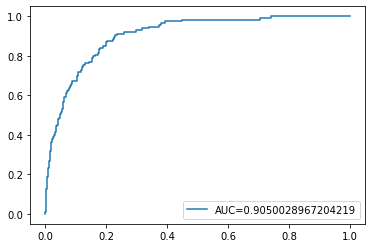

In [18]:
#plot ROC curve
y_pred_proba = log_regression.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.legend(loc=4)
plt.show()

## Analysis
I'd say this is a pretty worthless model.  I predict a student will detault about 20% of the time.  Put another way I am ~5x more likely to state that a student will not default when they really do.   